# **Notebook 3 - Statistical Tests on the Effect of Environmental Variables on Seagrass Nitrogen**

___ 

## **Part 1 - Import and visualize daily data**

### **Import library**

In [63]:
import os
import scipy
import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
from scipy.spatial import cKDTree

import io
import requests

import urllib.request
import datetime as dt
from dateutil.relativedelta import *

import netCDF4
from netCDF4 import Dataset, num2date

import seaborn as sns
import pymannkendall as mk

import warnings
warnings.simplefilter('ignore')

from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,7)


---

### **Define a function for making a new dataframe for statistical tests**

In [64]:
## open nc data files of each site
##   of each year from 2012-2014
##   for both baseline and preindustrial models

## define a function to calculate the mean value of grids of each day
def calculate_mean_df(dataset, year, model, site):
    data = dataset
    variables = ["temp", "salt", "DIN", "FineSed", "SG_N", "SGH_N"]
    means = {}

    for variable in variables:
        mean_df = pd.DataFrame(data[variable].mean(dim=("longitude", "latitude")))
        means[variable] = mean_df

    df = pd.concat(means, axis=1, join="inner")
    df.columns = ["temp_mean", "salt_mean", "DIN_mean", "FineSed_mean", "SG_N_mean", "SGH_N_mean"]
    df.to_csv(f"{model}_{site}_{year}_df.csv", index=False)


## open nc data files of each year from 2012-2014 for both baseline and preindustrial models
## and save results in csv files for later analyses
years = [2012, 2013, 2014]
models = ["baseline_data", "preindustrial_data"]
sites = ["Cleveland_Bay", "Upstart_Bay", "Gladstone", "River_Heads"]
for year in years:
    for model in models:
        for site in sites:
            dataset = xr.open_dataset(f"{model}_{site}_flooding_period_6_parameters_{year}.nc")
            calculate_mean_df(dataset, year, model, site)

---
---

### **Site 1 - Cleveland Bay**

Plot daily data for each year for both model scenarios

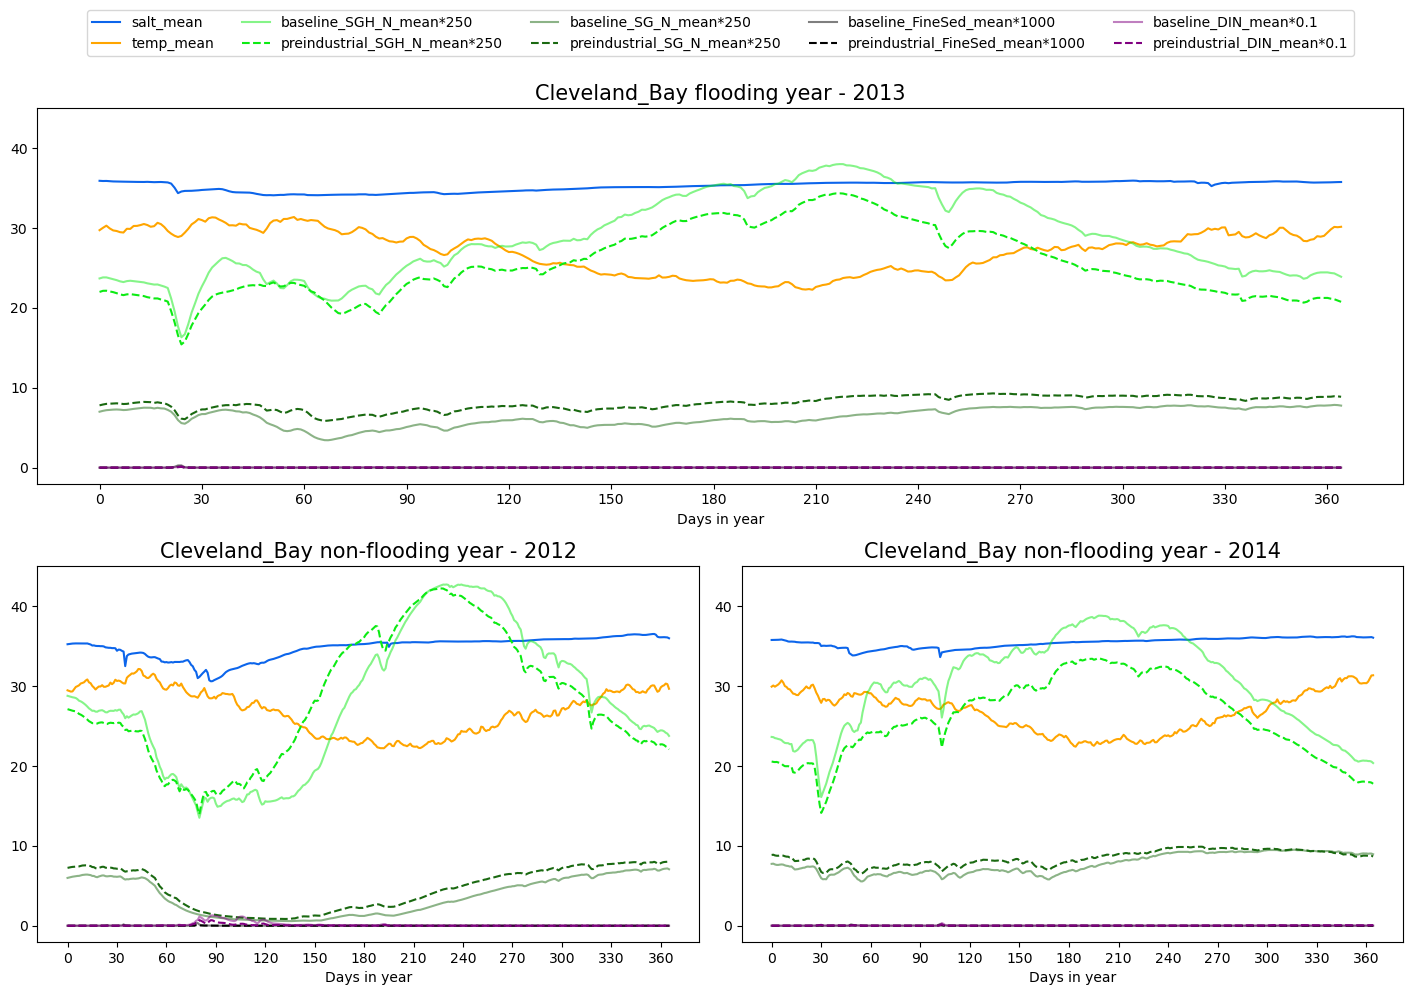

In [65]:
## read csv for graph plotting
baseline_Cleveland_Bay_2012_df = pd.read_csv("baseline_data_Cleveland_Bay_2012_df.csv")
baseline_Cleveland_Bay_2013_df = pd.read_csv("baseline_data_Cleveland_Bay_2013_df.csv")
baseline_Cleveland_Bay_2014_df = pd.read_csv("baseline_data_Cleveland_Bay_2014_df.csv")

preindustrial_Cleveland_Bay_2012_df = pd.read_csv("preindustrial_data_Cleveland_Bay_2012_df.csv")
preindustrial_Cleveland_Bay_2013_df = pd.read_csv("preindustrial_data_Cleveland_Bay_2013_df.csv")
preindustrial_Cleveland_Bay_2014_df = pd.read_csv("preindustrial_data_Cleveland_Bay_2014_df.csv")


# Create a figure and a 2x2 grid of subplots
plt.figure(figsize=(15, 10))


# Subplot 1 (upper)
plt.subplot(2,1,1)
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.salt_mean, label="salt_mean", color='#0c65eb', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.temp_mean, label="temp_mean", color='orange', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.SGH_N_mean*250, label="baseline_SGH_N_mean*250", color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2013_df.index, preindustrial_Cleveland_Bay_2013_df.SGH_N_mean*250, label="preindustrial_SGH_N_mean*250", color='#0ceb13', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.SG_N_mean*250, label="baseline_SG_N_mean*250", color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2013_df.index, preindustrial_Cleveland_Bay_2013_df.SG_N_mean*250, label="preindustrial_SG_N_mean*250", color='#1a6911', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.FineSed_mean*1000, label="baseline_FineSed_mean*1000", color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2013_df.index, preindustrial_Cleveland_Bay_2013_df.FineSed_mean*1000, label="preindustrial_FineSed_mean*1000", color='black', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2013_df.index, baseline_Cleveland_Bay_2013_df.DIN_mean*0.1, label="baseline_DIN_mean*0.1", color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2013_df.index, preindustrial_Cleveland_Bay_2013_df.DIN_mean*0.1, label="preindustrial_DIN_mean*0.1", color='purple', linestyle='--')
plt.ylim(-2, 45)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Cleveland_Bay flooding year - 2013", fontsize = 15)
plt.legend(loc='center', bbox_to_anchor = (0.5, 1.2), ncol = 5)


# Subplot 2 (lower-left)
plt.subplot(2,2,3)
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2012_df.index, preindustrial_Cleveland_Bay_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2012_df.index, preindustrial_Cleveland_Bay_2012_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2012_df.index, preindustrial_Cleveland_Bay_2012_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2012_df.index, baseline_Cleveland_Bay_2012_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2012_df.index, preindustrial_Cleveland_Bay_2012_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 45)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Cleveland_Bay non-flooding year - 2012", fontsize = 15)


# Subplot 3 (lower-right)
plt.subplot(2,2,4)
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2014_df.index, preindustrial_Cleveland_Bay_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2014_df.index, preindustrial_Cleveland_Bay_2014_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2014_df.index, preindustrial_Cleveland_Bay_2014_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Cleveland_Bay_2014_df.index, baseline_Cleveland_Bay_2014_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Cleveland_Bay_2014_df.index, preindustrial_Cleveland_Bay_2014_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 45)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Cleveland_Bay non-flooding year - 2014", fontsize = 15)


# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
plt.savefig('Cleveland_Bay_daily_3years_combined.png')


# Show the plot
plt.show()

---
---

### **Site 2 - Upstart Bay**

Plot daily data for each year for both model scenarios

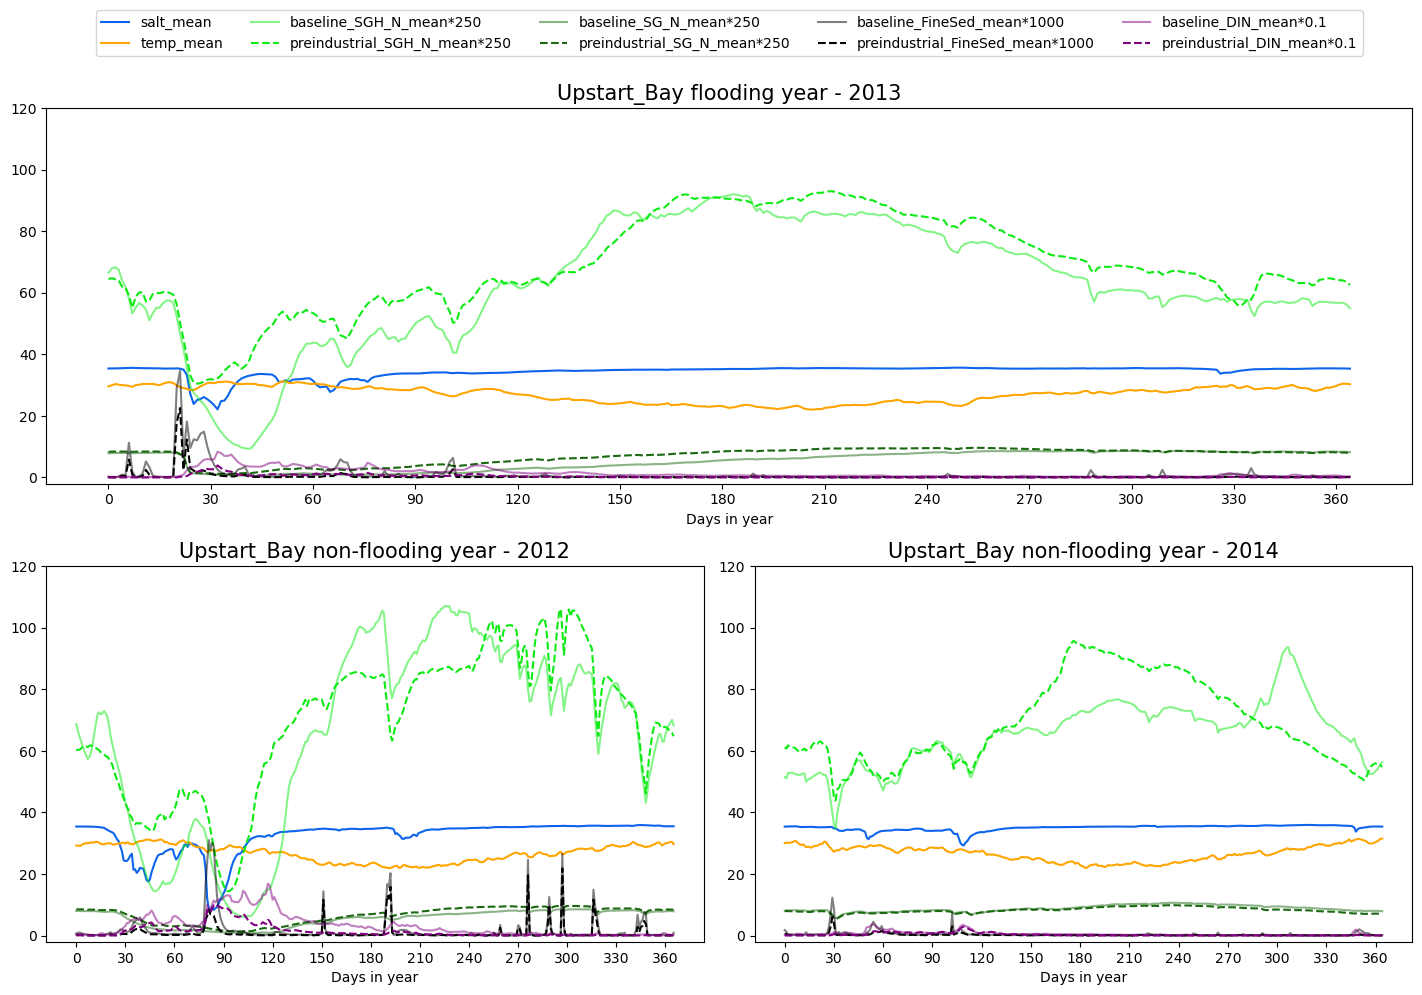

In [66]:
## read csv for graph plotting
baseline_Upstart_Bay_2012_df = pd.read_csv("baseline_data_Upstart_Bay_2012_df.csv")
baseline_Upstart_Bay_2013_df = pd.read_csv("baseline_data_Upstart_Bay_2013_df.csv")
baseline_Upstart_Bay_2014_df = pd.read_csv("baseline_data_Upstart_Bay_2014_df.csv")

preindustrial_Upstart_Bay_2012_df = pd.read_csv("preindustrial_data_Upstart_Bay_2012_df.csv")
preindustrial_Upstart_Bay_2013_df = pd.read_csv("preindustrial_data_Upstart_Bay_2013_df.csv")
preindustrial_Upstart_Bay_2014_df = pd.read_csv("preindustrial_data_Upstart_Bay_2014_df.csv")


# Create a figure and a 2x2 grid of subplots
plt.figure(figsize=(15, 10))


# Subplot 1 (upper)
plt.subplot(2,1,1)
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.salt_mean, label="salt_mean", color='#0c65eb', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.temp_mean, label="temp_mean", color='orange', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.SGH_N_mean*250, label="baseline_SGH_N_mean*250", color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2013_df.index, preindustrial_Upstart_Bay_2013_df.SGH_N_mean*250, label="preindustrial_SGH_N_mean*250", color='#0ceb13', linestyle='--')
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.SG_N_mean*250, label="baseline_SG_N_mean*250", color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2013_df.index, preindustrial_Upstart_Bay_2013_df.SG_N_mean*250, label="preindustrial_SG_N_mean*250", color='#1a6911', linestyle='--')
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.FineSed_mean*1000, label="baseline_FineSed_mean*1000", color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2013_df.index, preindustrial_Upstart_Bay_2013_df.FineSed_mean*1000, label="preindustrial_FineSed_mean*1000", color='black', linestyle='--')
plt.plot(baseline_Upstart_Bay_2013_df.index, baseline_Upstart_Bay_2013_df.DIN_mean*0.1, label="baseline_DIN_mean*0.1", color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2013_df.index, preindustrial_Upstart_Bay_2013_df.DIN_mean*0.1, label="preindustrial_DIN_mean*0.1", color='purple', linestyle='--')
plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Upstart_Bay flooding year - 2013", fontsize = 15)
plt.legend(loc='center', bbox_to_anchor = (0.5, 1.2), ncol = 5)


# Subplot 2 (lower-left)
plt.subplot(2,2,3)
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2012_df.index, preindustrial_Upstart_Bay_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2012_df.index, preindustrial_Upstart_Bay_2012_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2012_df.index, preindustrial_Upstart_Bay_2012_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Upstart_Bay_2012_df.index, baseline_Upstart_Bay_2012_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2012_df.index, preindustrial_Upstart_Bay_2012_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Upstart_Bay non-flooding year - 2012", fontsize = 15)


# Subplot 3 (lower-right)
plt.subplot(2,2,4)
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2014_df.index, preindustrial_Upstart_Bay_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2014_df.index, preindustrial_Upstart_Bay_2014_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2014_df.index, preindustrial_Upstart_Bay_2014_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Upstart_Bay_2014_df.index, baseline_Upstart_Bay_2014_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Upstart_Bay_2014_df.index, preindustrial_Upstart_Bay_2014_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Upstart_Bay non-flooding year - 2014", fontsize = 15)


# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
plt.savefig('Upstart_Bay_daily_3years_combined.png')


# Show the plot
plt.show()


---
---

### **Site 3 - Gladstone**

Plot daily data for each year for both model scenarios

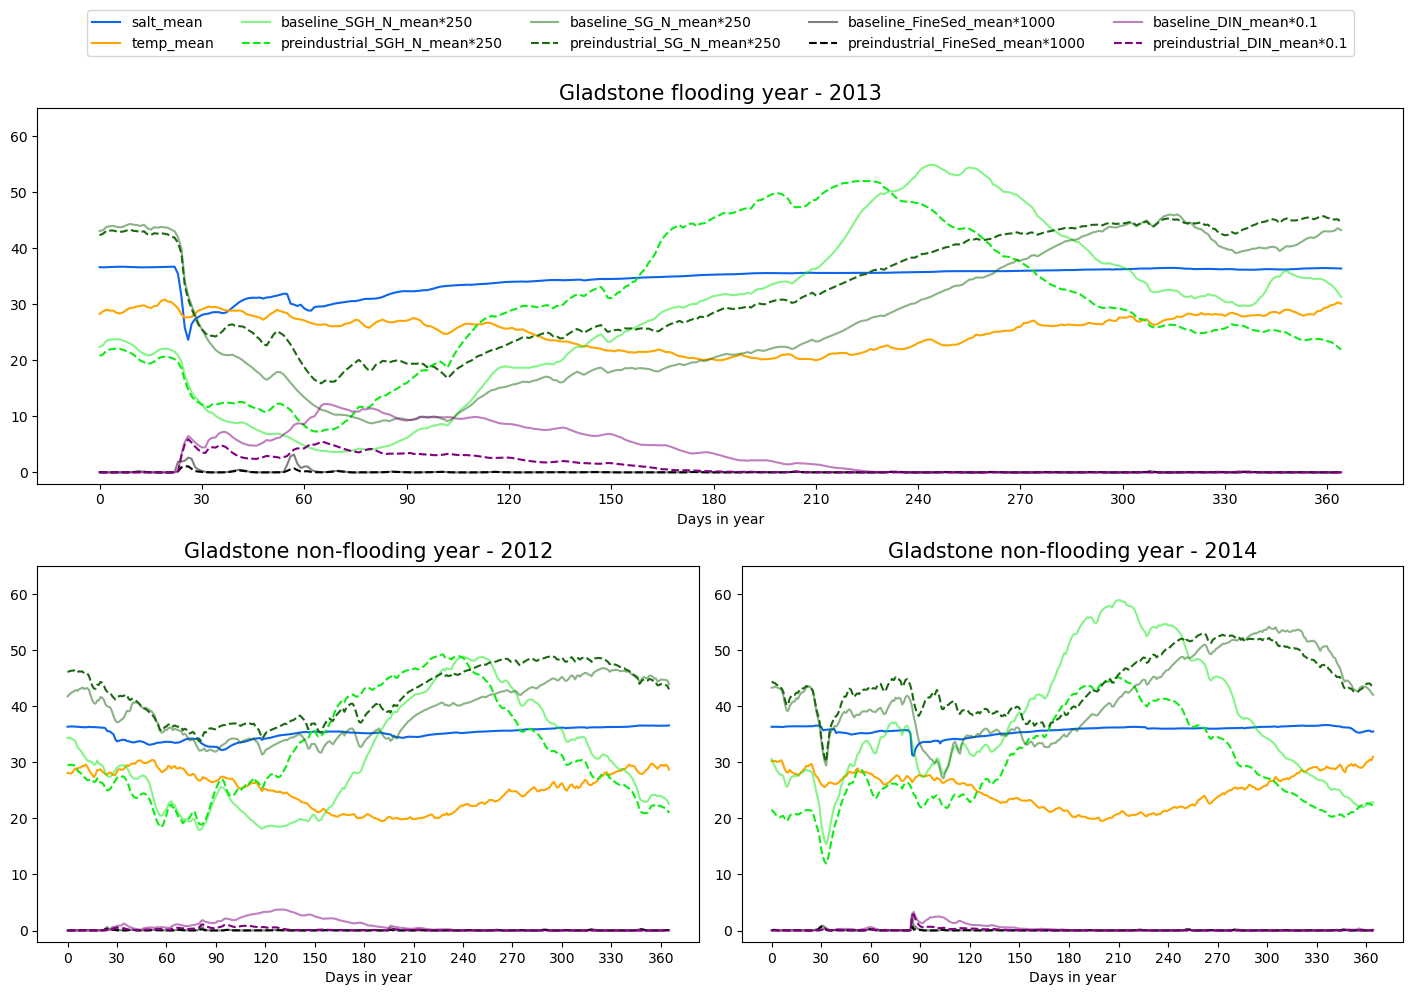

In [67]:
## read csv for graph plotting
baseline_Gladstone_2012_df = pd.read_csv("baseline_data_Gladstone_2012_df.csv")
baseline_Gladstone_2013_df = pd.read_csv("baseline_data_Gladstone_2013_df.csv")
baseline_Gladstone_2014_df = pd.read_csv("baseline_data_Gladstone_2014_df.csv")

preindustrial_Gladstone_2012_df = pd.read_csv("preindustrial_data_Gladstone_2012_df.csv")
preindustrial_Gladstone_2013_df = pd.read_csv("preindustrial_data_Gladstone_2013_df.csv")
preindustrial_Gladstone_2014_df = pd.read_csv("preindustrial_data_Gladstone_2014_df.csv")


# Create a figure and a 2x2 grid of subplots
plt.figure(figsize=(15, 10))


# Subplot 1 (upper)
plt.subplot(2,1,1)
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.salt_mean, label="salt_mean", color='#0c65eb', linestyle='solid')
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.temp_mean, label="temp_mean", color='orange', linestyle='solid')
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.SGH_N_mean*250, label="baseline_SGH_N_mean*250", color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2013_df.index, preindustrial_Gladstone_2013_df.SGH_N_mean*250, label="preindustrial_SGH_N_mean*250", color='#0ceb13', linestyle='--')
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.SG_N_mean*250, label="baseline_SG_N_mean*250", color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2013_df.index, preindustrial_Gladstone_2013_df.SG_N_mean*250, label="preindustrial_SG_N_mean*250", color='#1a6911', linestyle='--')
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.FineSed_mean*1000, label="baseline_FineSed_mean*1000", color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2013_df.index, preindustrial_Gladstone_2013_df.FineSed_mean*1000, label="preindustrial_FineSed_mean*1000", color='black', linestyle='--')
plt.plot(baseline_Gladstone_2013_df.index, baseline_Gladstone_2013_df.DIN_mean*0.1, label="baseline_DIN_mean*0.1", color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2013_df.index, preindustrial_Gladstone_2013_df.DIN_mean*0.1, label="preindustrial_DIN_mean*0.1", color='purple', linestyle='--')
plt.ylim(-2, 65)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Gladstone flooding year - 2013", fontsize = 15)
plt.legend(loc='center', bbox_to_anchor = (0.5, 1.2), ncol = 5)


# Subplot 2 (lower-left)
plt.subplot(2,2,3)
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2012_df.index, preindustrial_Gladstone_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2012_df.index, preindustrial_Gladstone_2012_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2012_df.index, preindustrial_Gladstone_2012_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Gladstone_2012_df.index, baseline_Gladstone_2012_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2012_df.index, preindustrial_Gladstone_2012_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 65)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Gladstone non-flooding year - 2012", fontsize = 15)


# Subplot 3 (lower-right)
plt.subplot(2,2,4)
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2014_df.index, preindustrial_Gladstone_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2014_df.index, preindustrial_Gladstone_2014_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2014_df.index, preindustrial_Gladstone_2014_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_Gladstone_2014_df.index, baseline_Gladstone_2014_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_Gladstone_2014_df.index, preindustrial_Gladstone_2014_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 65)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("Gladstone non-flooding year - 2014", fontsize = 15)


# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
plt.savefig('Gladstone_daily_3years_combined.png')


# Show the plot
plt.show()

---
---

### **Site 4 - River Heads**

Plot daily data for each year for both model scenarios

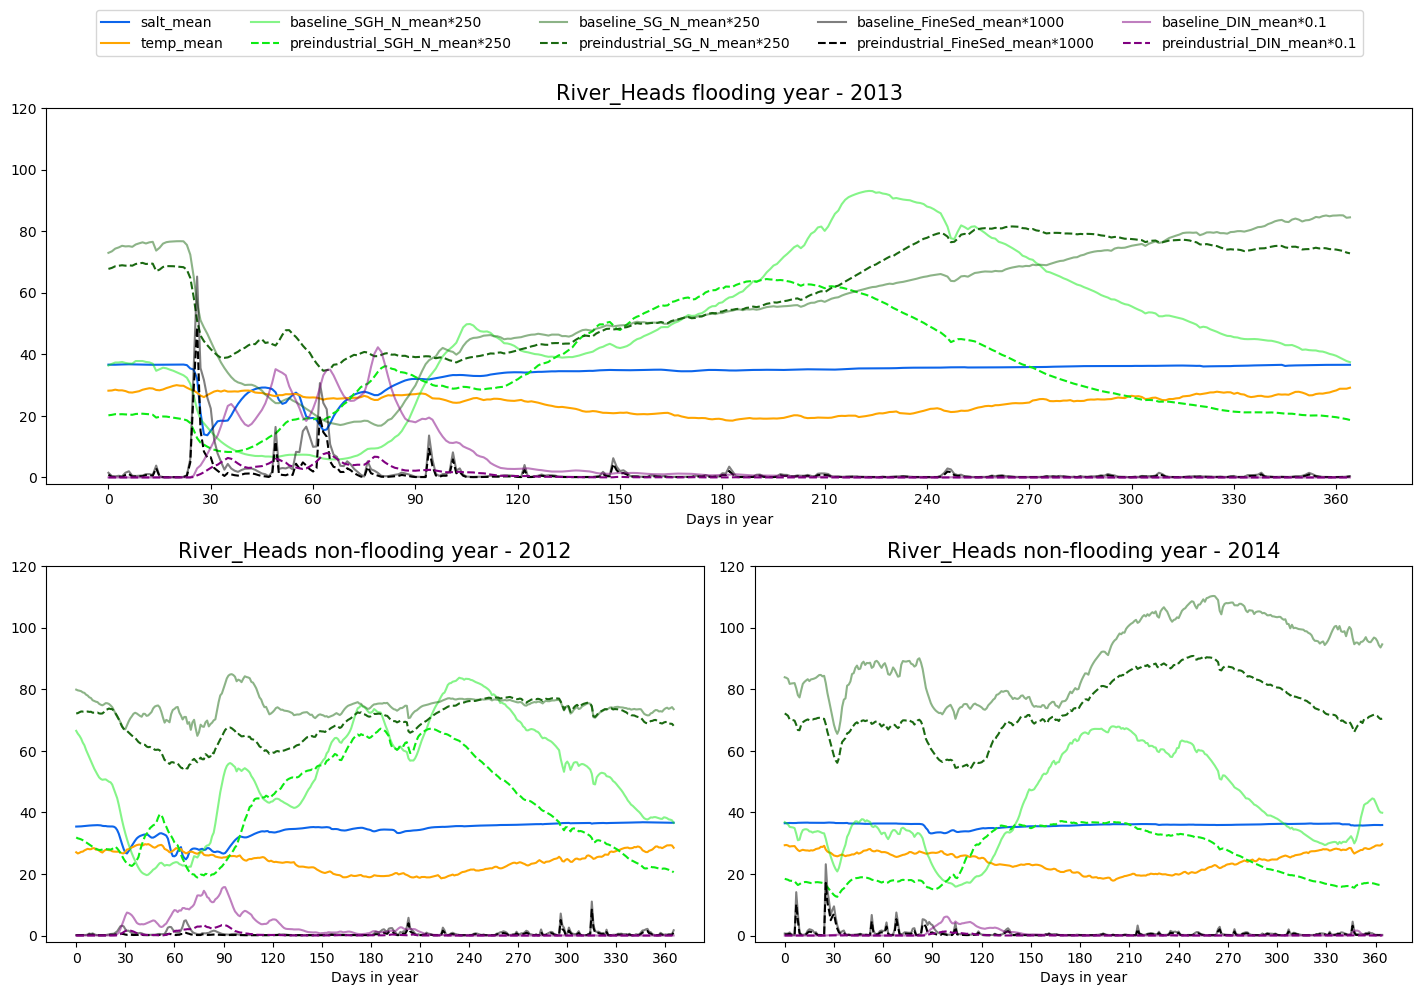

In [68]:
## read csv for graph plotting
baseline_River_Heads_2012_df = pd.read_csv("baseline_data_River_Heads_2012_df.csv")
baseline_River_Heads_2013_df = pd.read_csv("baseline_data_River_Heads_2013_df.csv")
baseline_River_Heads_2014_df = pd.read_csv("baseline_data_River_Heads_2014_df.csv")

preindustrial_River_Heads_2012_df = pd.read_csv("preindustrial_River_Heads_2012_df.csv")
preindustrial_River_Heads_2013_df = pd.read_csv("preindustrial_River_Heads_2013_df.csv")
preindustrial_River_Heads_2014_df = pd.read_csv("preindustrial_River_Heads_2014_df.csv")


# Create a figure and a 2x2 grid of subplots
plt.figure(figsize=(15, 10))


# Subplot 1 (upper)
plt.subplot(2,1,1)
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.salt_mean, label="salt_mean", color='#0c65eb', linestyle='solid')
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.temp_mean, label="temp_mean", color='orange', linestyle='solid')
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.SGH_N_mean*250, label="baseline_SGH_N_mean*250", color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2013_df.index, preindustrial_River_Heads_2013_df.SGH_N_mean*250, label="preindustrial_SGH_N_mean*250", color='#0ceb13', linestyle='--')
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.SG_N_mean*250, label="baseline_SG_N_mean*250", color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2013_df.index, preindustrial_River_Heads_2013_df.SG_N_mean*250, label="preindustrial_SG_N_mean*250", color='#1a6911', linestyle='--')
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.FineSed_mean*1000, label="baseline_FineSed_mean*1000", color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2013_df.index, preindustrial_River_Heads_2013_df.FineSed_mean*1000, label="preindustrial_FineSed_mean*1000", color='black', linestyle='--')
plt.plot(baseline_River_Heads_2013_df.index, baseline_River_Heads_2013_df.DIN_mean*0.1, label="baseline_DIN_mean*0.1", color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2013_df.index, preindustrial_River_Heads_2013_df.DIN_mean*0.1, label="preindustrial_DIN_mean*0.1", color='purple', linestyle='--')
plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("River_Heads flooding year - 2013", fontsize = 15)
plt.legend(loc='center', bbox_to_anchor = (0.5, 1.2), ncol = 5)


# Subplot 2 (lower-left)
plt.subplot(2,2,3)
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2012_df.index, preindustrial_River_Heads_2012_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2012_df.index, preindustrial_River_Heads_2012_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2012_df.index, preindustrial_River_Heads_2012_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_River_Heads_2012_df.index, baseline_River_Heads_2012_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2012_df.index, preindustrial_River_Heads_2012_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("River_Heads non-flooding year - 2012", fontsize = 15)


# Subplot 3 (lower-right)
plt.subplot(2,2,4)
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.salt_mean, color='#0c65eb', linestyle='solid')
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.temp_mean, color='orange', linestyle='solid')
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2014_df.index, preindustrial_River_Heads_2014_df.SGH_N_mean*250, color='#0ceb13', linestyle='--')
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.SG_N_mean*250, color='#1a6911', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2014_df.index, preindustrial_River_Heads_2014_df.SG_N_mean*250, color='#1a6911', linestyle='--')
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.FineSed_mean*1000, color='black', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2014_df.index, preindustrial_River_Heads_2014_df.FineSed_mean*1000, color='black', linestyle='--')
plt.plot(baseline_River_Heads_2014_df.index, baseline_River_Heads_2014_df.DIN_mean*0.1, color='purple', linestyle='solid', alpha = 0.5)
plt.plot(preindustrial_River_Heads_2014_df.index, preindustrial_River_Heads_2014_df.DIN_mean*0.1, color='purple', linestyle='--')

plt.ylim(-2, 120)
plt.xlabel('Days in year')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
plt.title("River_Heads non-flooding year - 2014", fontsize = 15)


# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
plt.savefig('River_Heads_daily_3years_combined.png')


# Show the plot
plt.show()

---
---

## **Part 2 - Statistical analysis**

### **Test for interaction between environmental variables and seagrass nitrogen**

After we have extracted and visualized the daily data, we now want to look at how one variable impact the other in a time-tagged fashion.

We employed the coding protocols from the references below with some modifications for the Granger causality tests:
- reference: https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
- reference: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2


In [69]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
warnings.filterwarnings("ignore")

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    # print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    # print('Critial Values:')
    # for key, value in critical_values.items():
    #     print(f'   {key} : {value}')


In [70]:
from statsmodels.tsa.stattools import grangercausalitytests

## maximum lag for 5 days
maxlag = 5

## test = [params_ftest, ssr_ftest, ssr_chi2test, lrtest]
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

---
---

### **Site 1 - Baseline Cleveland Bay 2013**

In [71]:
## read csv
baseline_Cleveland_Bay_2013 = pd.read_csv('baseline_data_Cleveland_Bay_2013_df.csv')
baseline_Cleveland_Bay_2013_pct_change = baseline_Cleveland_Bay_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(baseline_Cleveland_Bay_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.06621260055376404
num lags: 7
KPSS Test: salt_mean time series
p-value: 0.06850076584571985
num lags: 3
KPSS Test: DIN_mean time series
p-value: 0.06796803741356078
num lags: 1
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 3
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 9
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 8


In [72]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at day 23)
grangers_causation_matrix(baseline_Cleveland_Bay_2013_pct_change[0:21], variables = baseline_Cleveland_Bay_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(baseline_Cleveland_Bay_2013_pct_change[22:60], variables = baseline_Cleveland_Bay_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(baseline_Cleveland_Bay_2013_pct_change[61:120], variables = baseline_Cleveland_Bay_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(baseline_Cleveland_Bay_2013_pct_change[121:364], variables = baseline_Cleveland_Bay_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0000,0.2293,0.3888,0.4654,0.3787
salt_mean_y,0.0260,1.0000,0.3566,0.0376,0.6587,0.1810
DIN_mean_y,0.0004,0.4058,1.0000,0.0011,0.2236,0.0626
FineSed_mean_y,0.0000,0.0002,0.1387,1.0000,0.5981,0.2835
SG_N_mean_y,0.0345,0.3563,0.5250,0.0987,1.0000,0.0003
SGH_N_mean_y,0.0000,0.5260,0.0049,0.0786,0.0000,1.0000


### **Site 1 - Preindustrial Cleveland Bay 2013**

In [73]:
## read csv
preindustrial_Cleveland_Bay_2013 = pd.read_csv('preindustrial_data_Cleveland_Bay_2013_df.csv')
preindustrial_Cleveland_Bay_2013_pct_change = preindustrial_Cleveland_Bay_2013.pct_change().dropna()


## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.06621260055376404
num lags: 7
KPSS Test: salt_mean time series
p-value: 0.06850076584571985
num lags: 3
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 2
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 3
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 7
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 8


In [74]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event
grangers_causation_matrix(preindustrial_Cleveland_Bay_2013_pct_change[0:21], variables = preindustrial_Cleveland_Bay_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(preindustrial_Cleveland_Bay_2013_pct_change[22:60], variables = preindustrial_Cleveland_Bay_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(preindustrial_Cleveland_Bay_2013_pct_change[61:120], variables = preindustrial_Cleveland_Bay_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(preindustrial_Cleveland_Bay_2013_pct_change[121:364], variables = preindustrial_Cleveland_Bay_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0000,0.2400,0.7202,0.4220,0.3188
salt_mean_y,0.0260,1.0000,0.1692,0.2011,0.7573,0.2442
DIN_mean_y,0.0021,0.4025,1.0000,0.0000,0.0003,0.0004
FineSed_mean_y,0.0000,0.0692,0.4010,1.0000,0.4669,0.5024
SG_N_mean_y,0.0080,0.1816,0.2471,0.0161,1.0000,0.0001
SGH_N_mean_y,0.0001,0.6406,0.0812,0.0134,0.0000,1.0000


### **Site 1 - Baseline Cleveland Bay 2012**

In [75]:
## read csv
baseline_Cleveland_Bay_2012 = pd.read_csv('baseline_data_Cleveland_Bay_2012_df.csv')
baseline_Cleveland_Bay_2012_pct_change = baseline_Cleveland_Bay_2012.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(baseline_Cleveland_Bay_2012_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.03169031902951498
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 1
KPSS Test: DIN_mean time series
p-value: 0.0743642113357542
num lags: 7
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 9
KPSS Test: SG_N_mean time series
p-value: 0.01
num lags: 11
KPSS Test: SGH_N_mean time series
p-value: 0.04728258937703756
num lags: 8


In [76]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at day 23)
grangers_causation_matrix(baseline_Cleveland_Bay_2012_pct_change[0:21], variables = baseline_Cleveland_Bay_2012_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(baseline_Cleveland_Bay_2012_pct_change[22:60], variables = baseline_Cleveland_Bay_2012_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(baseline_Cleveland_Bay_2012_pct_change[61:120], variables = baseline_Cleveland_Bay_2012_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(baseline_Cleveland_Bay_2012_pct_change[121:364], variables = baseline_Cleveland_Bay_2012_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0013,0.141,0.2768,0.1208,0.3529
salt_mean_y,0.4854,1.0000,0.000,0.6594,0.2267,0.0087
DIN_mean_y,0.0000,0.1053,1.000,0.0000,0.0067,0.0000
FineSed_mean_y,0.0013,0.0031,0.745,1.0000,0.3118,0.0393
SG_N_mean_y,0.0002,0.2199,0.164,0.0006,1.0000,0.0000
SGH_N_mean_y,0.0005,0.4508,0.000,0.0000,0.0124,1.0000


### **Site 1 - Preindustrial Cleveland Bay 2012**

In [77]:
## read csv
preindustrial_Cleveland_Bay_2012 = pd.read_csv('preindustrial_data_Cleveland_Bay_2012_df.csv')
preindustrial_Cleveland_Bay_2012_pct_change = preindustrial_Cleveland_Bay_2012.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(preindustrial_Cleveland_Bay_2012_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.03169031902951498
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 1
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 4
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 9
KPSS Test: SG_N_mean time series
p-value: 0.01
num lags: 11
KPSS Test: SGH_N_mean time series
p-value: 0.03625197809739551
num lags: 8


In [78]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at day 23)
grangers_causation_matrix(preindustrial_Cleveland_Bay_2012_pct_change[0:21], variables = preindustrial_Cleveland_Bay_2012_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(preindustrial_Cleveland_Bay_2012_pct_change[22:60], variables = preindustrial_Cleveland_Bay_2012_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(preindustrial_Cleveland_Bay_2012_pct_change[61:120], variables = preindustrial_Cleveland_Bay_2012_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(preindustrial_Cleveland_Bay_2012_pct_change[121:364], variables = preindustrial_Cleveland_Bay_2012_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0013,0.2785,0.3433,0.0282,0.1234
salt_mean_y,0.4854,1.0000,0.0000,0.7582,0.0729,0.0000
DIN_mean_y,0.0000,0.0318,1.0000,0.0000,0.0329,0.0000
FineSed_mean_y,0.0218,0.0038,0.5447,1.0000,0.1607,0.0773
SG_N_mean_y,0.0007,0.8011,0.0711,0.0004,1.0000,0.0000
SGH_N_mean_y,0.0003,0.3950,0.0001,0.0000,0.0055,1.0000


---
---

### **Site 2 - Baseline Upstart Bay 2013**

In [79]:
## read csv
baseline_Upstart_Bay_2013 = pd.read_csv('baseline_data_Upstart_Bay_2013_df.csv')
baseline_Upstart_Bay_2013_pct_change = baseline_Upstart_Bay_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(baseline_Upstart_Bay_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.09535826949630434
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 5
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 6
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 0
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 9
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 10


In [80]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at day 23)
grangers_causation_matrix(baseline_Upstart_Bay_2013_pct_change[0:21], variables = baseline_Upstart_Bay_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(baseline_Upstart_Bay_2013_pct_change[22:60], variables = baseline_Upstart_Bay_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(baseline_Upstart_Bay_2013_pct_change[61:120], variables = baseline_Upstart_Bay_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(baseline_Upstart_Bay_2013_pct_change[121:364], variables = baseline_Upstart_Bay_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0046,0.2029,0.0573,0.4316,0.4253
salt_mean_y,0.0648,1.0000,0.2398,0.5734,0.8516,0.6695
DIN_mean_y,0.0714,0.0022,1.0000,0.0038,0.1486,0.0059
FineSed_mean_y,0.0187,0.2481,0.5261,1.0000,0.4442,0.8031
SG_N_mean_y,0.0005,0.5039,0.0912,0.0000,1.0000,0.0018
SGH_N_mean_y,0.0002,0.1375,0.0000,0.0000,0.0621,1.0000


### **Site 2 - Preindustrial Upstart Bay 2013**

In [81]:
## read csv
preindustrial_Upstart_Bay_2013 = pd.read_csv('preindustrial_data_Upstart_Bay_2013_df.csv')
preindustrial_Upstart_Bay_2013_pct_change = preindustrial_Upstart_Bay_2013.pct_change().dropna()


## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(preindustrial_Upstart_Bay_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.09535826949630434
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 5
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 6
KPSS Test: FineSed_mean time series
p-value: 0.08034945129352516
num lags: 2
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 8
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 9


In [82]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at day 23)
grangers_causation_matrix(preindustrial_Upstart_Bay_2013_pct_change[0:21], variables = preindustrial_Upstart_Bay_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(preindustrial_Upstart_Bay_2013_pct_change[22:60], variables = preindustrial_Upstart_Bay_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(preindustrial_Upstart_Bay_2013_pct_change[61:120], variables = preindustrial_Upstart_Bay_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(preindustrial_Upstart_Bay_2013_pct_change[121:364], variables = preindustrial_Upstart_Bay_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.0046,0.0175,0.0731,0.2469,0.2687
salt_mean_y,0.0648,1.0000,0.0040,0.5115,0.9541,0.7583
DIN_mean_y,0.0027,0.0047,1.0000,0.0001,0.0306,0.0000
FineSed_mean_y,0.0006,0.1346,0.2620,1.0000,0.8082,0.6153
SG_N_mean_y,0.0000,0.2888,0.4406,0.0003,1.0000,0.0005
SGH_N_mean_y,0.0000,0.0000,0.0338,0.0000,0.0000,1.0000


---
---

### **Site 3 - Baseline Gladstone 2013**

In [83]:
## read csv
baseline_Gladstone_2013 = pd.read_csv('baseline_data_Gladstone_2013_df.csv')
baseline_Gladstone_2013_pct_change = baseline_Gladstone_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(baseline_Gladstone_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.024791212559927545
num lags: 7
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 4
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 5
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 4
KPSS Test: SG_N_mean time series
p-value: 0.012817621576000013
num lags: 10
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 10


In [84]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at 26 Jan)
grangers_causation_matrix(baseline_Gladstone_2013_pct_change[0:24], variables = baseline_Gladstone_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(baseline_Gladstone_2013_pct_change[25:60], variables = baseline_Gladstone_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(baseline_Gladstone_2013_pct_change[61:120], variables = baseline_Gladstone_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(baseline_Gladstone_2013_pct_change[121:364], variables = baseline_Gladstone_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.7203,0.8494,0.0064,0.0052,0.4385
salt_mean_y,0.0037,1.0000,0.5238,0.2121,0.0106,0.1279
DIN_mean_y,0.0002,0.1204,1.0000,0.0001,0.0096,0.0394
FineSed_mean_y,0.0001,0.0065,0.2489,1.0000,0.6214,0.2912
SG_N_mean_y,0.0713,0.2732,0.3007,0.4101,1.0000,0.8672
SGH_N_mean_y,0.0004,0.1421,0.0015,0.0860,0.0000,1.0000


### **Site 3 - Preindustrial Gladstone 2013**

In [85]:
## read csv
preindustrial_Gladstone_2013 = pd.read_csv('preindustrial_data_Gladstone_2013_df.csv')
preindustrial_Gladstone_2013_pct_change = preindustrial_Gladstone_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(preindustrial_Gladstone_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.024791212559927545
num lags: 7
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 4
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 4
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 6
KPSS Test: SG_N_mean time series
p-value: 0.06229320418149716
num lags: 9
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 10


In [86]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at 26 Jan)
grangers_causation_matrix(preindustrial_Gladstone_2013_pct_change[0:24], variables = preindustrial_Gladstone_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(preindustrial_Gladstone_2013_pct_change[25:60], variables = preindustrial_Gladstone_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(preindustrial_Gladstone_2013_pct_change[61:120], variables = preindustrial_Gladstone_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(preindustrial_Gladstone_2013_pct_change[121:364], variables = preindustrial_Gladstone_2013_pct_change.columns)


,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.7203,0.2604,0.0013,0.0043,0.4679
salt_mean_y,0.0037,1.0000,0.3450,0.3946,0.0292,0.1621
DIN_mean_y,0.0005,0.5484,1.0000,0.0000,0.0198,0.0875
FineSed_mean_y,0.0000,0.0049,0.0871,1.0000,0.5268,0.1679
SG_N_mean_y,0.0157,0.2629,0.1131,0.5143,1.0000,0.5848
SGH_N_mean_y,0.0009,0.7942,0.0211,0.1068,0.0000,1.0000


---
---

### **Site 4 - Baseline River Heads 2013**

In [87]:
## read csv
baseline_River_Heads_2013 = pd.read_csv('baseline_data_River_Heads_2013_df.csv')
baseline_River_Heads_2013_pct_change = baseline_River_Heads_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(baseline_River_Heads_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.017452226038029074
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 5
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 6
KPSS Test: FineSed_mean time series
p-value: 0.1
num lags: 3
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 10
KPSS Test: SGH_N_mean time series
p-value: 0.1
num lags: 11


In [88]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at 26 Jan)
grangers_causation_matrix(baseline_River_Heads_2013_pct_change[0:24], variables = baseline_River_Heads_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(baseline_River_Heads_2013_pct_change[25:60], variables = baseline_River_Heads_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(baseline_River_Heads_2013_pct_change[61:120], variables = baseline_River_Heads_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(baseline_River_Heads_2013_pct_change[121:364], variables = baseline_River_Heads_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.1190,0.0204,0.1194,0.5681,0.1509
salt_mean_y,0.1757,1.0000,0.0709,0.2568,0.4392,0.3827
DIN_mean_y,0.1071,0.4430,1.0000,0.1479,0.0434,0.0001
FineSed_mean_y,0.5033,0.3816,0.7462,1.0000,0.0352,0.3782
SG_N_mean_y,0.1304,0.0356,0.6529,0.4834,1.0000,0.2132
SGH_N_mean_y,0.0020,0.1425,0.0000,0.0124,0.0000,1.0000


### **Site 4 - Preindustrial River Heads 2013**

In [89]:
## read csv
preindustrial_River_Heads_2013 = pd.read_csv('preindustrial_data_River_Heads_2013_df.csv')
preindustrial_River_Heads_2013_pct_change = preindustrial_River_Heads_2013.pct_change().dropna()

## check stationarity of time series
print('KPSS Test: temp_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['temp_mean'])
print('KPSS Test: salt_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['salt_mean'])
print('KPSS Test: DIN_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['DIN_mean'])
print('KPSS Test: FineSed_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['FineSed_mean'])
print('KPSS Test: SG_N_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['SG_N_mean'])
print('KPSS Test: SGH_N_mean time series')
kpss_test(preindustrial_River_Heads_2013_pct_change['SGH_N_mean'])


KPSS Test: temp_mean time series
p-value: 0.017452226038029074
num lags: 5
KPSS Test: salt_mean time series
p-value: 0.1
num lags: 5
KPSS Test: DIN_mean time series
p-value: 0.1
num lags: 7
KPSS Test: FineSed_mean time series
p-value: 0.05291533480863946
num lags: 3
KPSS Test: SG_N_mean time series
p-value: 0.1
num lags: 9
KPSS Test: SGH_N_mean time series
p-value: 0.07824060342956025
num lags: 10


In [90]:
## grangers causation test on all combinations of the variables
## if p-value < 0.001, x "causes" y

## before the flooding event (cyclone hits at 26 Jan)
grangers_causation_matrix(preindustrial_River_Heads_2013_pct_change[0:24], variables = preindustrial_River_Heads_2013_pct_change.columns)

## one month covering the flooding event
grangers_causation_matrix(preindustrial_River_Heads_2013_pct_change[25:60], variables = preindustrial_River_Heads_2013_pct_change.columns)

## two months after the flooding event
grangers_causation_matrix(preindustrial_River_Heads_2013_pct_change[61:120], variables = preindustrial_River_Heads_2013_pct_change.columns)

## remaining 8 months covering the flooding year
grangers_causation_matrix(preindustrial_River_Heads_2013_pct_change[121:364], variables = preindustrial_River_Heads_2013_pct_change.columns)

,temp_mean_x,salt_mean_x,DIN_mean_x,FineSed_mean_x,SG_N_mean_x,SGH_N_mean_x
temp_mean_y,1.0000,0.1190,0.1901,0.2846,0.3298,0.0078
salt_mean_y,0.1757,1.0000,0.5076,0.3270,0.4101,0.3329
DIN_mean_y,0.2000,0.5486,1.0000,0.0000,0.0864,0.0019
FineSed_mean_y,0.3516,0.2769,0.1924,1.0000,0.0599,0.0041
SG_N_mean_y,0.1411,0.1096,0.0076,0.1825,1.0000,0.0132
SGH_N_mean_y,0.0150,0.0798,0.0000,0.0000,0.0000,1.0000


---